In [2]:
import numpy as np
import pandas as pd


# Pandas 中的数据结构: Series 和 DataFrame.
## Series

Series可以看成 Excel 表格中的一行或者一列,这一行/列同时还拥有 Excel 中行/列的 index 信息.当然这个 index 的信息在 Series 中是可以随意更改的.

DataFrame 可以看成一个 Excel 表格中的一个 Tab 页面,同时也可以被认为是有限个的Series组合而来的.

In [3]:
# Series (from ndarray)
# 创建 series 的语法是: s = pd.Series(data, index=index). data 可以是 python dict,ndarray,也可以是一个向量值.
# index 可以不设置,方法会用默认的数字排序来作为 index
s_from_ndarray_num_index = pd.Series(np.random.randn(5))
print(s_from_ndarray_num_index)
print('-------------------')
print(s_from_ndarray_num_index.index) # 这里的 type 不是一个 list 而是一个 RangeIndex. 

print('===================')
# index 可以手动设置
s_from_ndarray = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
print(s_from_ndarray)
print('-------------------')
print(s_from_ndarray.index)



0   -0.621676
1   -1.048098
2   -1.764983
3   -0.032389
4   -0.320472
dtype: float64
-------------------
RangeIndex(start=0, stop=5, step=1)
a   -0.956497
b    0.321424
c    0.873014
d   -0.667815
e    0.015728
dtype: float64
-------------------
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [7]:
# Series (from python dic)
d = {'a': 0, 'b': 1, 'c': 2}
d1 = pd.Series(d)
print(d1)
print('===================')
d = {"a": 0.0, "b": 1.0, "c": 2.0}
d2 = pd.Series(d)
print(d2)
print('===================')
d3 = pd.Series(d, index=["b", "c", "d", "a"])
print(d3)
# NaN (not a number) is the standard missing data marker used in pandas.
print('===================')


a    0
b    1
c    2
dtype: int64
a    0.0
b    1.0
c    2.0
dtype: float64
b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


In [8]:
# Series (from scalar value)
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

### Series 的使用
1. Series 的数据结构和 numpy 的 ndarray 非常相似,而且用法几乎一模一样.


In [14]:
print(s_from_ndarray)
print('===================')
print(s_from_ndarray[0])
# Like a NumPy array, a pandas Series has a single dtype.
print(s_from_ndarray.dtype)
print('===================')
print(s_from_ndarray[:3])
print('===================')
print(s_from_ndarray[s_from_ndarray > s_from_ndarray.median()])
print('===================')
print(s_from_ndarray[[4,3,1]])
print('===================')
print(np.exp(s_from_ndarray))

a   -0.956497
b    0.321424
c    0.873014
d   -0.667815
e    0.015728
dtype: float64
-0.9564970905598805
float64
a   -0.956497
b    0.321424
c    0.873014
dtype: float64
b    0.321424
c    0.873014
dtype: float64
e    0.015728
d   -0.667815
b    0.321424
dtype: float64
a    0.384236
b    1.379090
c    2.394117
d    0.512828
e    1.015853
dtype: float64


In [17]:
# 如果需要 array,可以使用 Series.array来返回一个 array. 这时就可以做一些不需要 index 的操作.
print(s_from_ndarray.array)
print('===================')
# 或者可以直接把 Series 转为 numpy array.
print(s_from_ndarray.to_numpy())

<PandasArray>
[-0.9564970905598805, 0.32142391696303424,  0.8730144542096077,
 -0.6678154662833619, 0.01572838315167402]
Length: 5, dtype: float64
[-0.95649709  0.32142392  0.87301445 -0.66781547  0.01572838]


2. Series 和 python dict 的结构也很相似而且用法相似. key 就是 Series 的 index.

In [18]:
print(s_from_ndarray['a'])
print('===================')
print(s_from_ndarray['e'])
print('===================')
print(s_from_ndarray)

-0.9564970905598805
0.01572838315167402
a   -0.956497
b    0.321424
c    0.873014
d   -0.667815
e    0.015728
dtype: float64


In [19]:
# 检查 index 的时候也可以用 dict 的方法.
print('e' in s_from_ndarray)
print('===================')
print('apple' in s_from_ndarray)

True
False


In [20]:
# 当使用 dict-like 特性的时候,不推荐直接用`[]`来读取数据, 因为如果 key/index 不存在,那么程序就会报错. 这里推荐使用`get()`方法.
print(s_from_ndarray_num_index.get('apple'))

print('===================')
# 这个用法类似于 python 的 setdefault()
print(s_from_ndarray_num_index.get('apple', default=np.nan))


None
nan


#### Series 的矢量操作和标签排列

In [21]:
# Series可以像 ndarray 那样做一些计算的操作
print(s_from_ndarray)
print('===================')
print(s_from_ndarray + s_from_ndarray)
print('===================')
print(s_from_ndarray * 2)
print('===================')
print(np.exp(s_from_ndarray))

a   -0.956497
b    0.321424
c    0.873014
d   -0.667815
e    0.015728
dtype: float64
a   -1.912994
b    0.642848
c    1.746029
d   -1.335631
e    0.031457
dtype: float64
a   -1.912994
b    0.642848
c    1.746029
d   -1.335631
e    0.031457
dtype: float64
a    0.384236
b    1.379090
c    2.394117
d    0.512828
e    1.015853
dtype: float64


In [24]:
# 当 index 不一样的 series 合并到一起的时候, label 会自动合并. 
# Tip: None + Any = NaN
print(s_from_ndarray[:4] + s_from_ndarray[2:])

a         NaN
b         NaN
c    1.746029
d   -1.335631
e         NaN
dtype: float64


### Series的 name 属性
series 的 name 有时候会自动被赋予. 比如当 series 是从dataframe 剥离出来的时候, 此时的 name 是列的 label.

In [26]:
print(s := pd.Series(np.random.randn(5), name="something"))
print('===================')
print(s.name)
print('-------------------')
# rename 会返回一个完整的 series
s2 = s.rename("diff")
print(s.name)
print(s2.name)




0    1.659789
1   -0.420465
2   -0.637779
3    1.386913
4   -1.511210
Name: something, dtype: float64
something
-------------------
something
diff


## DataFrame
DataFrame是一个 2D 的带有 label 的数据结构.Dataframe 的每一列都可以是不同的数据类型.创建的时候可以直接传递 index(行 label) 和 columns(列 label) 的参数. DataFrame 可以从很多种数据类型种创建:

1. Dict of 1D ndarrays, lists, dicts, or Series
2. 2-D numpy.ndarray
3. Structured or record ndarray
4. A Series
5. Another DataFrame

### 从 dict of Series 或者 dict 创建

In [29]:
# 从 dict of Series 或者 dict 创建
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
# 直接创建
print(df := pd.DataFrame(d))
print('===================')
# 创建的时候选择 index 的顺序
print(pd.DataFrame(d, index=["d", "b", "a"]))
print('===================')
#创建的时候选择 index 的顺序而且添加 column 的 label.
print(pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"]))
print('===================')
print(df.index)
print('-------------------')
print(df.columns)


   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
   one  two
d  NaN  4.0
b  2.0  2.0
a  1.0  1.0
   two three
d  4.0   NaN
b  2.0   NaN
a  1.0   NaN
Index(['a', 'b', 'c', 'd'], dtype='object')
-------------------
Index(['one', 'two'], dtype='object')


### 从 dict of ndarrays / lists 创建
ndarrays 必须长度一致. 如果有 index 参数传输,那么 index 的长度和 ndarrays 的长度也需要一致.

In [32]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [31]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


### 从结构化/记录数据创建
这种情况和从 dict of arrays 创建是一样的.

In [33]:
# dtypes: https://numpy.org/devdocs/reference/arrays.dtypes.html
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [34]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [35]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


### 从 list of dicts 创建

In [36]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [37]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [38]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


### 从 list of tuples 创建
可以用 tuple 来创建MultiIndex 的结构.

In [39]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

### 从 Series 创建

In [40]:
ser = pd.Series(range(3), index=list("abc"), name="ser")
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


### 从 namedtuple 创建

In [41]:
from collections import namedtuple
Point = namedtuple("Point", "x y")
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [42]:
Point3D = namedtuple("Point3D", "x y z")
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


### 从 list of dataclasses 创建
[Data Classes](https://www.python.org/dev/peps/pep-0557) 也可以被转化成 DataFrame. 语法和使用方法类似于从 list of dictionary 创建.

In [43]:
from dataclasses import make_dataclass
Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


### 其他备用构造器
DataFrame 还有一些备用的构造器, 比如:
1. DataFrame.from_dict()
2. DataFrame.from_record()

方法 1 可以从 dict of dict 创建 DataFrame. 

方法 2 可以从 list of tuples 或者 list of ndarray 创建 DataFrame.

In [44]:
# 方法 1
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"],
)


,one,two,three
A,1,2,3
B,4,5,6


In [45]:
# 方法 2
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


### 列的选择和计算操作
DataFrame 可以被当作一个 dict of like-indexed Series object.

In [46]:
print(df["one"])

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [47]:
df["three"] = df["one"] * df["two"] # 3 = 1 * 2
df["flag"] = df["one"] > 2  # creat new  column
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [48]:
# 删除操作可以用 del 也可以用 pop(). 
del df["two"]
three = df.pop('three')
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [49]:
# 插入值的时候可以整列插入一样的值
df["foo"] = "bar"
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [50]:
# 插入 Series 类的时候,如果 Series 的长度和 DataFrame 不同,则按照 DataFrame 的长度和 index 作为标准.
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [51]:
# column 的插入默认是插入到最后. DataFrame.insert() 也可以插入到特定的位置.
df.insert(1, "bar", df["one"])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [52]:
# 添加新的 column 也可以用 assign() 方法. assign() 方法总会返回一个拷贝的数据,而源数据不会被修改.
df.assign(new_col=df['bar']/2)

,one,bar,flag,foo,one_trunc,new_col
a,1.0,1.0,False,bar,1.0,0.5
b,2.0,2.0,False,bar,2.0,1.0
c,3.0,3.0,True,bar,NaN,1.5
d,NaN,NaN,False,bar,NaN,NaN


In [63]:
# 上边的方法放了一个预先计算的值,我们也可以给一列赋一个方法.
df.assign(is_bigger_than_two=lambda x: (x['one'] > 2))

,one,bar,flag,foo,one_trunc,is_bigger_than_two
a,1.0,1.0,False,bar,1.0,False
b,2.0,2.0,False,bar,2.0,False
c,3.0,3.0,True,bar,NaN,True
d,NaN,NaN,False,bar,NaN,False


<AxesSubplot:xlabel='x_index', ylabel='squart'>

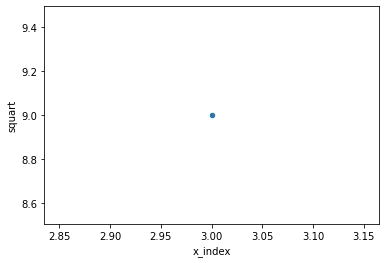

In [64]:
(
    df.query('one > 2')
    .assign(
        squart = df['one']**2,
        x_index = df['one']
    ).plot(kind='scatter',x='x_index', y='squart')
)

### DataFrame 中的数学运算
DataFrame 的数学运算都是 element-wise 的操作. 



In [65]:
# 做运算操作以后,DataFrame 的行和列会自动对齐.
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

df + df2


,A,B,C,D
0,-2.176627,1.248052,-0.394768,NaN
1,1.830082,-1.512009,0.125776,NaN
2,0.313136,-1.538596,-1.238115,NaN
3,3.387791,0.715223,0.501599,NaN
4,-0.403772,0.560839,1.595572,NaN
5,-1.867488,2.675476,-0.016479,NaN
6,0.707727,-1.928601,1.170143,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [66]:
# 当做一些介于 Series 和 DataFrame 之间的运算,默认的方法是在列上对齐 Series 然后再做 row-wise 的运算.
df - df.iloc[0]


,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,3.134132,-0.253447,-0.412298,0.988804
2,0.706992,-1.132767,-0.008968,-0.034739
3,3.111927,-1.296050,0.416946,-0.997384
4,0.651235,0.313080,0.495333,0.406123
5,0.003800,0.952248,1.241657,0.423512
6,1.883474,-1.810581,-0.106824,0.269576
7,2.090558,-0.075425,-1.483306,1.379718
8,0.525210,-0.680445,-1.205713,-0.720025
9,2.280427,-0.316813,-0.885914,0.459446


In [67]:
# 普通的操作可以直接把 DataFrame 当成一个普通变量. DataFrame 的会自动转换为 element-wise 的运算.
df * 5

,A,B,C,D
0,-6.144862,3.730392,0.831488,-0.271852
1,9.525798,2.463156,-1.230001,4.672170
2,-2.609901,-1.933443,0.786648,-0.445550
3,9.414774,-2.749859,2.916219,-5.258772
4,-2.888686,5.295790,3.308154,1.758761
5,-6.125863,8.491633,7.039774,1.845709
6,3.272506,-5.322512,0.297369,1.076030
7,4.307930,3.353265,-6.585040,6.626736
8,-3.518812,0.328167,-5.197076,-3.871977
9,5.257275,2.146327,-3.598084,2.025377


In [68]:
1/df

,A,B,C,D
0,-0.813688,1.340342,6.013314,-18.392351
1,0.524890,2.029916,-4.065036,1.070167
2,-1.915781,-2.586061,6.356081,-11.222096
3,0.531080,-1.818275,1.714549,-0.950792
4,-1.730891,0.944146,1.511417,2.842910
5,-0.816212,0.588815,0.710250,2.708986
6,1.527881,-0.939406,16.814115,4.646712
7,1.160650,1.491084,-0.759297,0.754519
8,-1.420934,15.236148,-0.962079,-1.291330
9,0.951063,2.329561,-1.389629,2.468677


In [71]:
# 布尔值的操作也是 element-wise 的.
df1 = pd.DataFrame([1,0,1],dtype=bool)
df2 = pd.DataFrame([1,0,0],dtype=bool)
df1 & df2 # 不能用 and


,0
0,True
1,False
2,False


### DataFrame 也可以当作一个矩阵来做 Transpoing 的操作.
可以使用`.T` 或者 DataFrame.transpose()

In [74]:
df.T

,0,1,2,3,4,5,6,7,8,9
A,-1.228972,1.905160,-0.521980,1.882955,-0.577737,-1.225173,0.654501,0.861586,-0.703762,1.051455
B,0.746078,0.492631,-0.386689,-0.549972,1.059158,1.698327,-1.064502,0.670653,0.065633,0.429265
C,0.166298,-0.246000,0.157330,0.583244,0.661631,1.407955,0.059474,-1.317008,-1.039415,-0.719617
D,-0.054370,0.934434,-0.089110,-1.051754,0.351752,0.369142,0.215206,1.325347,-0.774395,0.405075


In [80]:
### DataFrame 的打印

# 配置展示的宽度和高度
pd.set_option('display.max_columns', 2)
pd.set_option('display.max_rows', 5)
df

,A,...,D
0,-1.228972,...,-0.054370
1,1.905160,...,0.934434
...,...,...,...
8,-0.703762,...,-0.774395
9,1.051455,...,0.405075
